# Evaluating the fundamental frequency using a Rayleigh-Ritz approach

Written by *Montabert Arnaud & Giry Cédric, Laboratoire de Mécanique Paris-Saclay, August 22, 2023*

**Citation:** *Montabert, A.; Giry, C.; Limoge Schraen, C.; Lépine, J.; Choueiri, C. Mercerat, E. D.; Guéguen, P. An Open Database to Evaluate the
Fundamental Frequency of Historical Masonry Towers through Empirical and Physics-based Formulations. Buildings 2023*

This document provides an example of Python scripts used in [This study] to evaluate flexural bending modes using a Rayleigh-Ritz approach based on a Timoshenko beam formulation. Scripts are described and can used for single computation but also more extensive computation using the TURRIS database. The structural parameters $\boldsymbol{p}$ for the tower are:
\begin{equation}
\boldsymbol{p}=\left\{H,S,I_y,k,E, \nu,\rho,k_s,k_r,k_n,h_n,M_b,h_b\right\}
\end{equation}
These parameters are descibed in Fig. 1 and Table 1.

<p align="center">
<img src="./figure/timo_SAM.png" alt="tower_model" width="400" height="auto">
</p>

**Figure 1**: Model of the bell tower of Sant'Agata del Mugello and its interaction with the adjacent nave and the ground.

|      Symbol      |    Unit    |             Description                                             |
| :---             |   :----:   | :---                                                                |
| $\boldsymbol{p}$ |            | Set of global geometrical parameters                                |
| $H$              |   [m]      | Height of the tower                                                 |
|$\ell_s$          |   [m]      | Width, lowest size of the tower’s section                           |
|$h_n$             |   [m]      | Height of interaction between the tower and any adjacent structures |
|$h_b$             |   [m]      | Altitude of the bell system                                         |
|$f_{0}$           |   [Hz]     | Eigenfrequency                                                      |
|$L_s$             |   [m]      | Length, largest size of the tower's section                         |
|$t_w$             |   [m]      | Wall's thickness                                                    |
|$h_b$             |   [m]      | Altitude of the bell system                                         |
|$S$               |   [$m^{2}$]| Surface area                                                        |
|$I_{z}$ | [$m^4$] | Second moment of inertia                                                         |
|$r$               |   [m]      | Radius of inertia                                                   |
|$E$               |  [MPa]     | Young modulus                                                       |
|$\rho$            |[kg.$m^{-3}$]| Volumetric mass density                                            |
|$\nu$             |[-]          | Poisson ratio                                                      |
|$k_s$             | [N.$m^{-1}$]| Soil/structure translational stiffness                             |
|$k_r$             | [N]         | Soil/structure rotational stiffness                                |
|$k_n$             | [N.$m^2$]   | Nave/structure translational stiffness                             |
|$M_b$             | [kg]        | Mass of the bell system                                            |
|$G$               | [Pa]        | Shear modulus                                                      |

**Table 1**: Parameters and symbols used to describe the model.

## Rayleigh-Ritz method

The potential energy $\mathcal{V}$ and the kinetic energy $\mathcal{T}$ write for the model described in Fig. 1, 
\begin{align}
\mathcal{V}=\mathcal{V}_{beam}+\mathcal{V}_{SSI}+\mathcal{V}_{TNI} \\
\mathcal{T}=\mathcal{T}_{beam}+\mathcal{T}_{bell}
\end{align}

The energies associated to the beam $\mathcal{V}_{beam}$ and $\mathcal{T}_{beam}$ write, 
\begin{align}
\mathcal{V}_{beam}&=\frac{1}{2}\int_0^H\left\{EI_z\left(\frac{\partial \theta}{\partial x}\right)^2+kGS\left(\theta-\frac{\partial v}{\partial x}\right)^2\right\}\mathrm{d}x \\
\mathcal{T}_{beam}&=\frac{1}{2}\int_0^H\left\{ \rho S \left(\frac{\partial v}{\partial t}\right)^2+\rho I_z \left(\frac{\partial \theta}{\partial t}\right)^2\right\} \mathrm{d}x
\end{align}
with $v(x,t)$ the transversal deflection and $\theta(x,t)$ the normal rotation. For the sake of simplicity, the shear coefficient is estimated with the formulas for thin-walled in [1]\\
The energy for the soil-structure interaction $\mathcal{V}_{SSI}$ writes,
\begin{equation}
\mathcal{V}_{SSI}=\frac{1}{2}\left(k_r\left(\left.\frac{\partial v}{\partial x}\right|_0 \right)^2 +k_s \left(\left.v\right|_0\right)^2\right) 
\end{equation}
The energy for the tower-nave interaction $\mathcal{V}_{TNI}$ writes,
\begin{equation}
\mathcal{V}_{TNI}=\frac{1}{2}\int_0^{h_n}k_n v^2 \mathrm{d}x
\end{equation}
The energy for the bell system $\mathcal{V}_{bell}$ writes,
\begin{equation}
\mathcal{T}_{bell}=\frac{1}{2}M_b\left(\left.\frac{\partial v}{\partial t}\right|_{h_b}\right)^2
\end{equation}
The displacement $v$ and the rotation $\theta$ fields of the beam are approximated over simple polynomial functions $\boldsymbol{\varphi}(x)$ and $\boldsymbol{\vartheta}(x)$, and their coordinates in the polynomial basis $\boldsymbol{R(t)}$, and $\boldsymbol{V(t)}$,
\begin{equation}
v(x,t)\approx\sum_{i=0}^{n_H}V_i(t)\varphi_i(x),\quad \theta(x,t)\approx\sum_{i=0}^{n_r}R_i(t)\vartheta_i(x)
\end{equation}
For the sake of simplicity, admissible functions (functions satisfying all the geometric boundary conditions) [2] are considered for the basis. For the cantilever beam, the following functions are used [3]:
\begin{equation}
    \varphi_i(x)=\left(\frac{x}{H} \right)^2\cdot\left(1-\frac{x}{H}\right)^{i-1}, \quad \vartheta_i(x)=\left(\frac{x}{H} \right)\cdot\left(1-\frac{x}{H}\right)^{i-1}
\end{equation}
In the presence of soil-structure interaction, the functions corresponding to free-free boundary conditions are considered [3],
\begin{equation}
    \varphi_i(x)=\left(1-\frac{x}{H}\right)^{i-1}, \quad \vartheta_i(x)=\left(1-\frac{x}{H}\right)^{i-1}
\end{equation}

The size of the system for the Rayleigh-Ritz model is equal to $n_H+n_r$.\\
By considering $\boldsymbol{q}(\boldsymbol{V}, \boldsymbol{R})$ as a generalized coordinates system, the equations of Lagrange write,
\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}}\left(\frac{\partial\mathcal{T}}{\partial \dot{\boldsymbol{q}}}\right)+\left(\frac{\partial\mathcal{V}}{\partial \boldsymbol{q}}\right)=\boldsymbol{0}
\end{equation}
After some mathematical developments, the equations of motion are,
\begin{equation}
\boldsymbol{M}.\ddot{\boldsymbol{q}}+\boldsymbol{K}.\boldsymbol{q}=\boldsymbol{0}
\end{equation}
Finally, the approximation of the eigenfrequencies $f_{mod}^{(i)}$ and the mode shapes $\mathcal{F}_i(\boldsymbol{\phi}^{(i)},x)$ are obtained by solving the generalized eigenvalues problem,
\begin{equation}
\left(\boldsymbol{K}-\left(2\cdot\pi\cdot f_{mod}^{(i)}\right)^2\boldsymbol{M} \right)\boldsymbol{\phi}^{(i)}=\boldsymbol{0}
\end{equation}


## The *Beam* Python Class

The Ritz-Rayleigh approach is encoded in the *Beam* Python Class. Let's compute the flexural modes of a towers.

In [2]:
from Beam import *

Three case studies *cas_study* can be computed depending on the interaction of the tower with its environment.
- 1. Cantilever beam
- 2. Cantilever beam with interaction with nave
- 3. Cantilever beam with interaction with nave and soil

In [3]:
cas_study = 1

The user can chose to compute the Timoshenko or the Euler-Bernouilli approach (parameter *model_ty*).

In [4]:
model_ty = 'Timoshenko'

Let's consisered a bounded tower interacting with soil with the following characteristics described in Table 1. 

In [5]:
# ~~~ Global model ~~~
H = 15                                                # Height of the tower
# ~~~ Tower model  ~~~
tw  = 0.9                                             # Wall thickness
Ls =  3.2                                             # Length
ls = 3.                                               # Width 
S   = Ls*ls - ((Ls-2*tw)*(ls-2*tw))                   # Surface section
Iz  = (Ls*(ls**3))/12 - ((Ls-2*tw)*((ls-2*tw)**3))/12 # Second moment of inertia
rho = 2200.                                           # Density
E   = 2.5e9                                           # Young modulus
nu = 0.3                                              # Poisson ratio
G = E/(2*(1+nu))                                      # Shear modulus
m = ((Ls-2*tw)*tw)/(ls*tw)                          
n = (Ls-2*tw)/ls
# shear (see [1])
kshear = (10*(1+nu)*(1+3*m)**2)/((12+72*m+150*m**2+90*m**3)+nu*(11+66*m+135*m**2+90*m**3)+10*n**2*((3+nu)*m+3*m**2))
# ~~~ Bell characteristics ~~~
hb = H                                                # Altitude of the bell system
Mb = 1000.                                            # Mass of the bell system
# ~~~ Soil/Structure interaction ~~~
ks    = 1.e7                                          # Soil/structure translational stiffness
kro   = 1.e8                                          # Soil/structure rotational stiffness
I0tow = rho*H*((Ls*H**2*ls/3+ls**2/12)-((Ls-2*tw)*H**2*(ls-2*tw)/3+(ls-2*tw)**2/12))
# ~~~ Adjacent building interaction ~~~
hn= 10.                                               # Interaction height
kN = 1.e9/hn                                          # Nave/structure translational stiffness

The aforementioned polynomial basis is defined as:

In [6]:
npol = 10 ; typep = 'Timo_poly' ;
paramPoly = {"npol":npol,"type":typep,"npolt":npol}

Let's assemble the model depending of the selected case study (*cas_study*).

In [7]:
# ~~~ Global model ~~~
paramM = {"H":H, "Beam_model":model_ty}
# ~~~ Tower model  ~~~
paramT = {"S":S,"Iz":Iz,"rho":rho,"E":E,"kshear":kshear,"G": G}
# ~~~ Bell characteristics ~~~
paramb = {"hb":hb,"Mb":Mb} 
# ~~~ Soil/Structure interaction ~~~
paramssi={"ks":ks,"kro":kro,"I0tow":I0tow} 
# ~~~ Adjacent building interaction ~~~
paramtni = {"kN":kN,"h":hn}  

# ~~~ Assemble the global model ~~~
if cas_study==1:
	param={"Model":paramM,"Tower":paramT,"Poly": paramPoly}
elif cas_study==2:
	param={"Model":paramM,"Tower":paramT,"TNI":paramtni,"Poly": paramPoly}
elif cas_study==3:
	param={"Model":paramM,"Tower":paramT,"TNI":paramtni,"SSI":paramssi,"Poly": paramPoly}
else:
	disp('Case not implemented')

Eigenfrequencies and eigenvectors of the three first flexural modes are evaluated.

In [8]:
# DEFINITION OF THE MODEL
# -----------------------
Model = ModelBellTower(param)

# MODAL ANALYSIS
# --------------
freq, shape, defo = Model.modal_analysis()

/home/arnaud/Documents/POSTDOC/ENS_PS/EMPIRICAL_F0/CODE/TURRIS/Beam.py:220: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  k_ij = quad(f,0, self.H)[0]
/home/arnaud/Documents/POSTDOC/ENS_PS/EMPIRICAL_F0/CODE/TURRIS/Beam.py:245: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  k_ij = quad(f,0, self.H)[0]


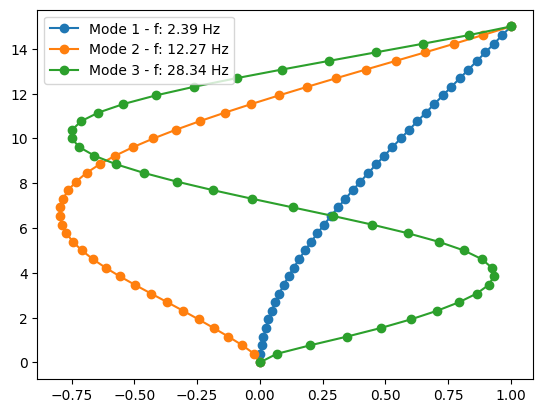

In [9]:
li_z = np.linspace(0, H, 40)
x = sym.symbols('x')
test_figure = True
if test_figure:
	plt.figure()
	for i in range(3):
		text = 'Mode '+str(i+1)+' - f: '+str(round(freq[i],2))+' Hz'
		if Model.beam == 'Timoshenko':
			mode = [defo[0][i].subs(x, value) for value in li_z]
		else:
			mode = [defo[i].subs(x, value) for value in li_z]
		plt.plot([item*1./np.max(np.abs(mode)) for item in mode], li_z,'o-',label = text)
	plt.legend()
	nfic = 'Case_'+str(cas_study)+'modes.png'
	plt.show()

## References
**[This study]** - Montabert, A.; Giry, C.; Limoge Schraen, C.; Lépine, J.; Choueiri, C. Mercerat, E. D.; Guéguen, P. An Open Database to Evaluate the
Fundamental Frequency of Historical Masonry Towers through Empirical and Physics-based Formulations. Buildings 2023*

**[1]** Cowper, G. The shear coefficient in Timoshenko’s beam theory. Journal of applied mechanics 1966, 33, 335–340.

**[2]** Meirovitch, L. Analytical methods in vibrations.; New York, McMillan, 1967.

**[3]** Mazanoglu, K. Natural frequency analyses of segmented Timoshenko–Euler beams using the Rayleigh–Ritz method. Journal of Vibration and Control 2017, 23, 2135–2154.